In [13]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# For producing decision tree diagrams.
from IPython.core.display import Image, display
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

from IPython.display import Image  
from sklearn import tree
import pydotplus


In [14]:
# Import Data
train_df = pd.read_csv('../data/train.csv')
#testing data
test_data = pd.read_csv('../data/train.csv')

In [15]:
print train_df.shape
print train_df.shape

(10886, 12)
(10886, 12)


In [16]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [17]:
# Create year and hour variables
train_df['hour'] = pd.DatetimeIndex(train_df['datetime']).hour
train_df['year'] = pd.DatetimeIndex(train_df['datetime']).year

In [18]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011


In [19]:
train_df['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

## Create a decision tree for splitting hours for Registered riders

In [20]:
# Set target and predictors
target = 'registered'
predictors = ['hour']
print train_df[predictors].shape
print train_df[target].shape

(10886, 1)
(10886,)


In [21]:
# Create DT and find best parameter
dt = DecisionTreeRegressor()
parameter_grid = {'min_impurity_split': 2. ** np.arange(-5, 5)}
param_searcher = GridSearchCV(dt, parameter_grid, cv=10)
param_searcher.fit(train_df[predictors], train_df[target])
dt = DecisionTreeRegressor(max_leaf_nodes=7, **param_searcher.best_params_)

In [22]:
dt.fit(train_df[predictors], train_df[target])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=7, min_impurity_split=0.03125,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [23]:
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=predictors, filled = True, rounded = True)

In [24]:
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

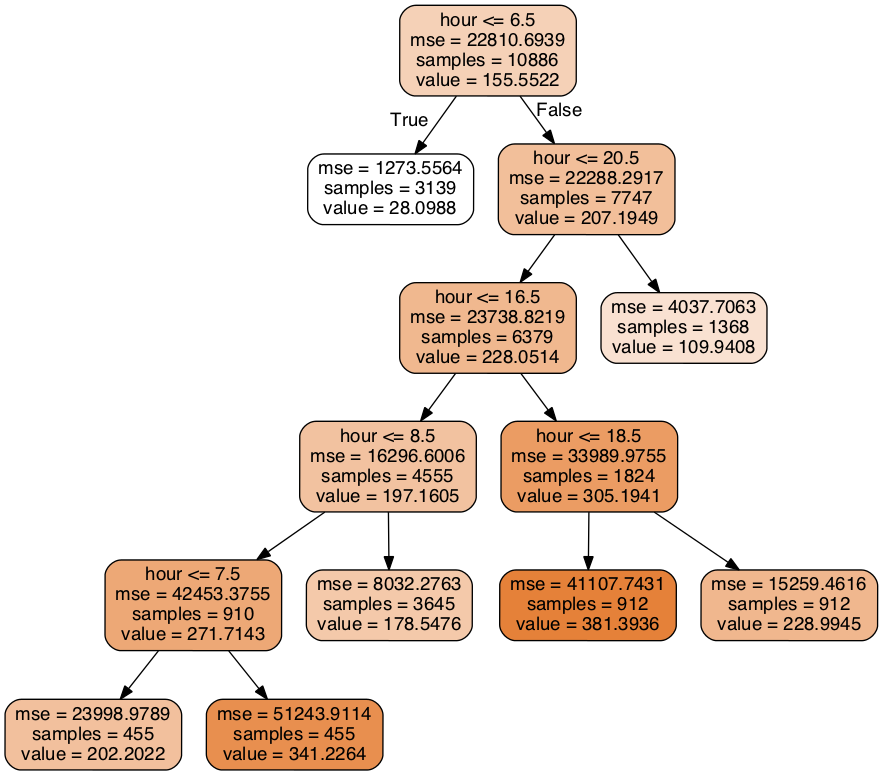

In [25]:
Image(graph.create_png())

## Create a decision tree for splitting hours for Casual riders

In [26]:
# Set target and predictors
target = 'casual'
predictors = ['hour']
print train_df[predictors].shape
print train_df[target].shape

(10886, 1)
(10886,)


In [27]:
# Create DT and find best parameter
dt = DecisionTreeRegressor()
parameter_grid = {'min_impurity_split': 2. ** np.arange(-5, 5)}
param_searcher = GridSearchCV(dt, parameter_grid, cv=10)
param_searcher.fit(train_df[predictors], train_df[target])
dt = DecisionTreeRegressor(max_leaf_nodes=7, **param_searcher.best_params_)

In [28]:
dt.fit(train_df[predictors], train_df[target])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=7, min_impurity_split=16.0, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [29]:
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=predictors, filled = True, rounded = True)

In [30]:
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

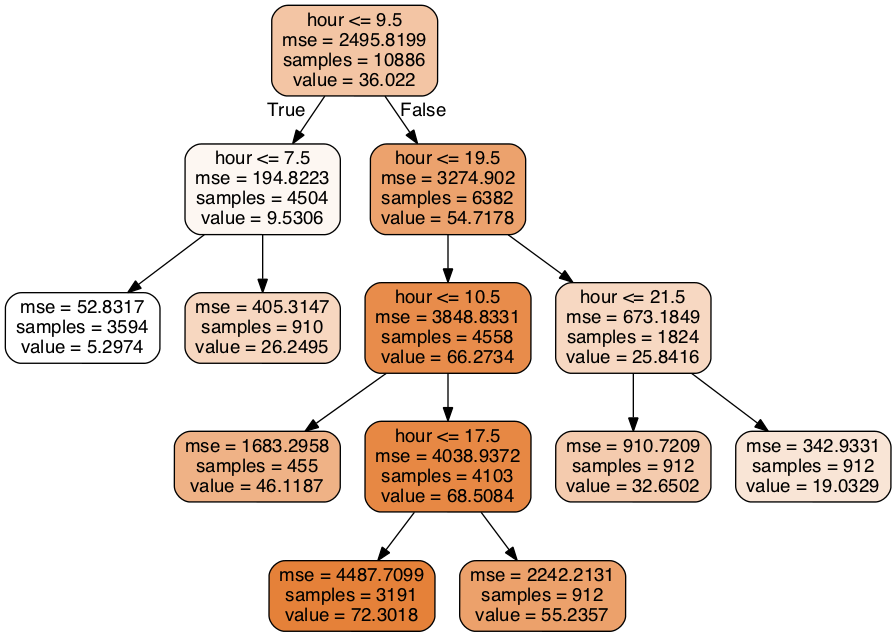

In [31]:
Image(graph.create_png())

## Create a decision tree for splitting ATEMP for Registered riders

In [32]:
# Set target and predictors
target = 'registered'
predictors = ['atemp']
print train_df[predictors].shape
print train_df[target].shape

(10886, 1)
(10886,)


In [33]:
# Create DT and find best parameter
dt = DecisionTreeRegressor()
parameter_grid = {'min_impurity_split': 2. ** np.arange(-5, 5)}
param_searcher = GridSearchCV(dt, parameter_grid, cv=10)
param_searcher.fit(train_df[predictors], train_df[target])
dt = DecisionTreeRegressor(max_leaf_nodes=7, **param_searcher.best_params_)

In [34]:
dt.fit(train_df[predictors], train_df[target])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=7, min_impurity_split=0.03125,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [35]:
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=predictors, filled = True, rounded = True)

In [36]:
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

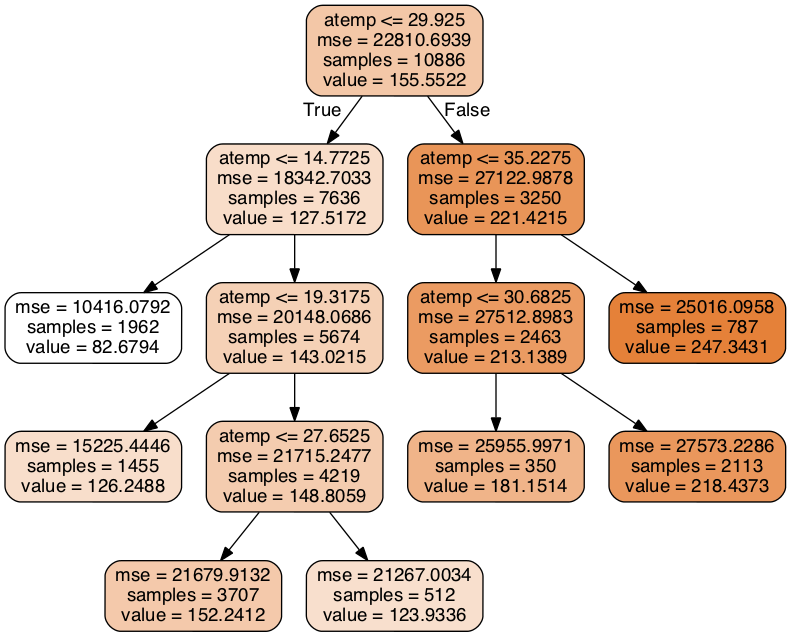

In [37]:
Image(graph.create_png())

## Create a decision tree for splitting ATEMP for Casual riders

In [38]:
# Set target and predictors
target = 'casual'
predictors = ['atemp']
print train_df[predictors].shape
print train_df[target].shape

(10886, 1)
(10886,)


In [39]:
# Create DT and find best parameter
dt = DecisionTreeRegressor()
parameter_grid = {'min_impurity_split': 2. ** np.arange(-5, 5)}
param_searcher = GridSearchCV(dt, parameter_grid, cv=10)
param_searcher.fit(train_df[predictors], train_df[target])
dt = DecisionTreeRegressor(max_leaf_nodes=7, **param_searcher.best_params_)

In [40]:
dt.fit(train_df[predictors], train_df[target])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=7, min_impurity_split=16.0, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

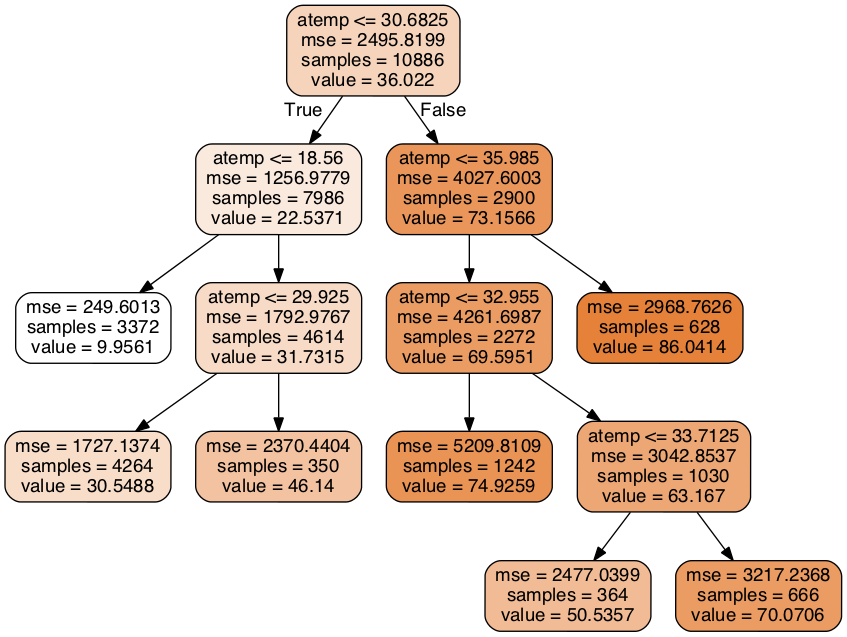

In [41]:
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=predictors, filled = True, rounded = True)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())